## Loan Predicaton

### code: python and machine learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('D:\\csv\\train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.drop(['Loan_ID'],axis=1,inplace=True)


In [5]:
data['Gender']=data['Gender'].fillna(0)
data['Married']=data['Married'].fillna(0)
data['Dependents']=data['Dependents'].fillna(0)
data['Self_Employed']=data['Self_Employed'].fillna(0)
data['LoanAmount']=data['LoanAmount'].fillna(0)
data['Credit_History']=data['Credit_History'].fillna(0)
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(0)

In [6]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
data.shape


(614, 12)

In [8]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,614.0,334.201954,82.183884,0.0,360.0,360.0,360.00,480.0
Credit_History,614.0,0.773616,0.418832,0.0,1.0,1.0,1.00,1.0


In [11]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Explotry analysis
give us limit of distribution

In [12]:
def inital_EDA(data):
    if isinstance(data,pd.DataFrame):
        total_na=data.isna().sum().sum()
        print('Total Records :',data.shape)
        print('Total number of NA :',total_na)
        cols_name=data.columns
        dtype=data.dtypes
        duniq=data.nunique()
        na_val= data.isna().sum()
        print('columns data','datatype','unique_df','NA_vals')
        for i in range(len(data.columns)):
            print('%38s %10s %10s %10s'%(cols_name[i],dtype[i],duniq[i],na_val[i]))
        else:
            print('error in the code')

              
              
              


In [13]:
inital_EDA(data)
# unique (Types)

Total Records : (614, 12)
Total number of NA : 0
columns data datatype unique_df NA_vals
                                Gender     object          3          0
                               Married     object          3          0
                            Dependents     object          5          0
                             Education     object          2          0
                         Self_Employed     object          3          0
                       ApplicantIncome      int64        505          0
                     CoapplicantIncome    float64        287          0
                            LoanAmount    float64        204          0
                      Loan_Amount_Term    float64         11          0
                        Credit_History    float64          2          0
                         Property_Area     object          3          0
                           Loan_Status     object          2          0
error in the code


### text data convert into categoris data

In [14]:
categorical = [var for var in data.columns if data[var].dtype=='O'] # O=object
print('all the categorical data are:',categorical)

all the categorical data are: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [15]:
data[categorical].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [16]:
for var in categorical:
    print(data[var].value_counts())

Male      489
Female    112
0          13
Name: Gender, dtype: int64
Yes    398
No     213
0        3
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
0       32
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


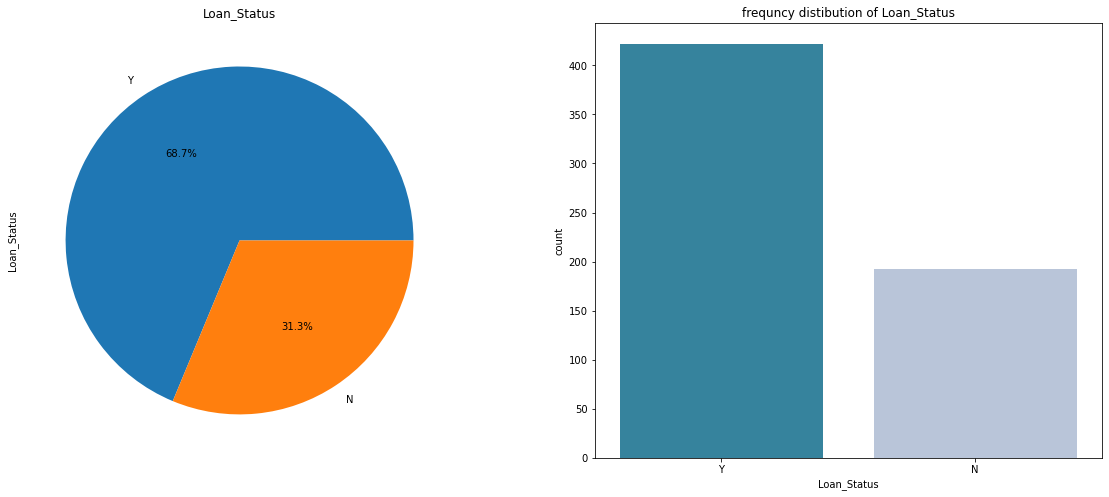

In [17]:
f,ax=plt.subplots(1,2,figsize=(20,8))
ax[0]=data['Loan_Status'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Loan_Status')
ax[1]=sns.countplot(x='Loan_Status',data=data,palette='PuBuGn_r')
ax[1].set_title('frequncy distibution of Loan_Status')
plt.show()

C:\Users\Shantanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

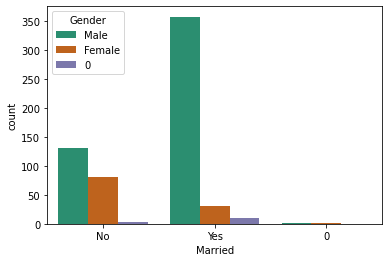

In [18]:
sns.countplot('Married',data=data,hue='Gender',palette='Dark2')

Text(0.5, 1.0, 'frequncy of Property_Area ')

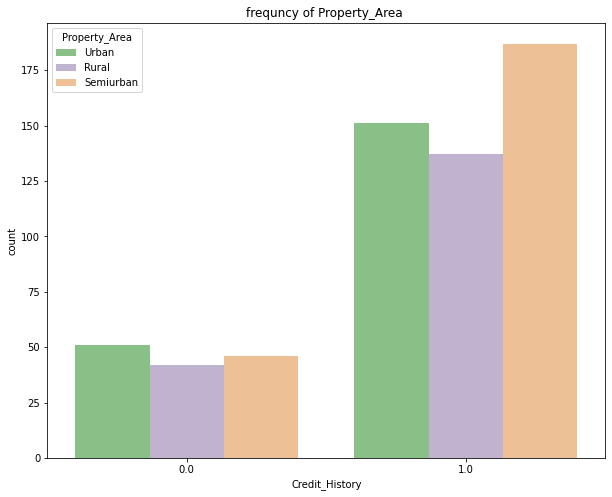

In [19]:
f,ax=plt.subplots(figsize=(10,8))
ax=sns.countplot(x='Credit_History',hue='Property_Area',data=data,palette='Accent')
ax.set_title('frequncy of Property_Area ')


<AxesSubplot:>

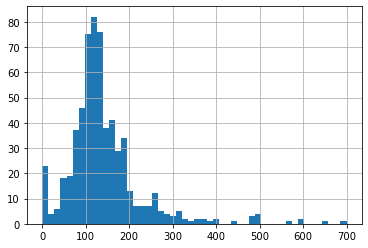

In [20]:
data['LoanAmount'].hist(bins=50)

Text(0.5, 1.0, 'frequncy of LoanAmount ')

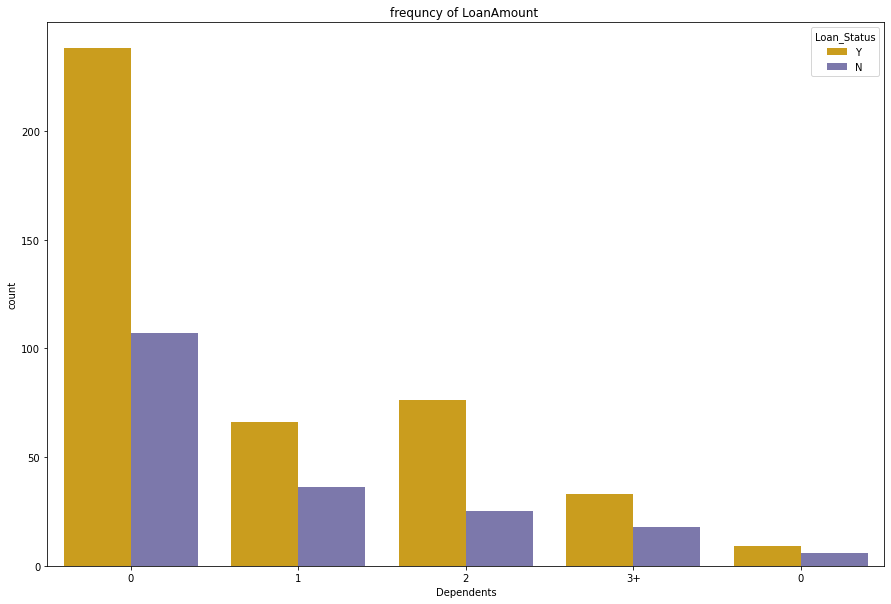

In [35]:
f,ax=plt.subplots(figsize=(15,10))
ax=sns.countplot(x='Dependents',hue='Loan_Status',data=data,palette='Dark2_r')
ax.set_title('frequncy of LoanAmount ')


### highest credit history

<function matplotlib.pyplot.show(close=None, block=None)>

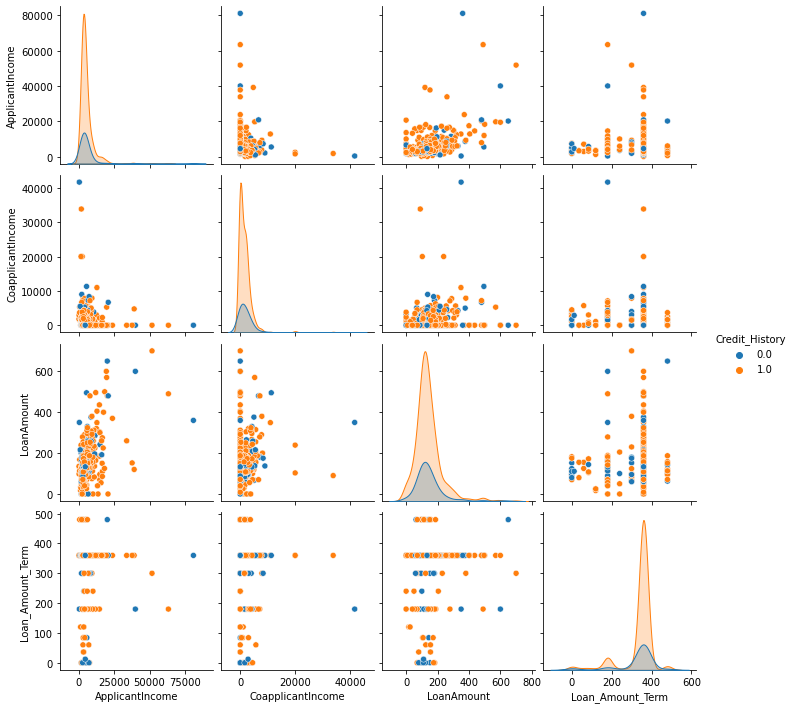

In [22]:
sns.pairplot(data,hue='Credit_History') # use target value
plt.show

In [23]:
x=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

## split the data

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape)

(491, 11) (123, 11)


In [25]:
print(Y_train.shape,Y_test.shape)

(491,) (123,)


In [26]:
categorical = [var for var in data.columns if data[var].dtype=='O'] # O=object
print('all the categorical data are:',categorical)

all the categorical data are: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [27]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=[ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)                          

In [28]:
print(X_train[0:5])

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
90        1        1           1          1              1             2958   
533       1        2           2          1              1            11250   
452       1        1           1          1              1             3948   
355       2        2           3          1              1             3813   
266       1        1           4          1              1             4708   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
90              2900.0       131.0             360.0             1.0   
533                0.0       196.0             360.0             0.0   
452             1733.0       149.0             360.0             0.0   
355                0.0       116.0             180.0             1.0   
266             1387.0       150.0             360.0             1.0   

     Property_Area  
90               1  
533              1  
452              2  
355     

In [29]:
numerical = [var for var in data.columns if data[var].dtype!='O'] # O=object
print('all the numerical data are:',numerical)

all the numerical data are: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [30]:
# import pandas as pd

# pd.concat(['Loan_ID'],axis=0,ignore_index=True)

# pd.concat([d,d1],axis=0,ignore_index=True)


cols= X_train.columns
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])




In [31]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.000000,0.0,0.0,-0.315083,0.877970,0.094488,0.0,0.0,-0.5
1,0.0,1.0,0.333333,0.0,0.0,2.613917,-0.459977,1.118110,0.0,-1.0,-0.5
2,0.0,0.0,0.000000,0.0,0.0,0.034617,0.339562,0.377953,0.0,-1.0,0.0
3,1.0,1.0,0.666667,0.0,0.0,-0.013070,-0.459977,-0.141732,-180.0,0.0,0.5
4,0.0,0.0,1.000000,0.0,0.0,0.303073,0.179931,0.393701,0.0,0.0,-0.5


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)

In [92]:
print(y_pred)

['Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y']


## Accuracy

In [33]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred)
print('RondomForest score',np.abs(score)*100)

RondomForest score 74.79674796747967


### Feature Score

In [34]:
feature_score=pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_score)


ApplicantIncome      0.214666
LoanAmount           0.211354
Credit_History       0.175683
CoapplicantIncome    0.123804
Dependents           0.063522
Property_Area        0.048268
Loan_Amount_Term     0.045010
Gender               0.031877
Education            0.030206
Self_Employed        0.028328
Married              0.027282
dtype: float64


### Tannu yadav